In [1]:
#intoduction to regression with neural networks in tensorflow
#import tensor flow
import tensorflow as tf
print(tf.__version__)

2.12.0


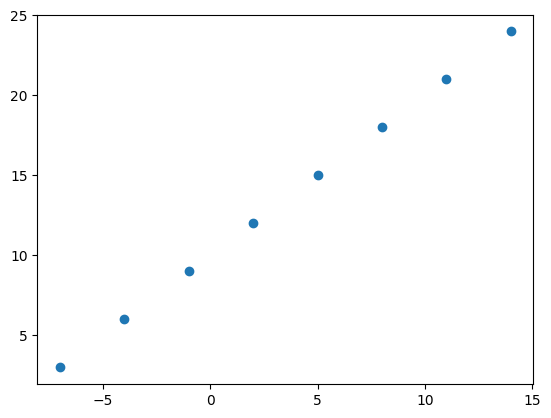

In [2]:
#create data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0 ])

#visualize it
plt.scatter(X,y);

In [3]:
y == X+10


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
#input and output shapes
#create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape


((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]


(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim


0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
#turn our numpy arrays inot tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

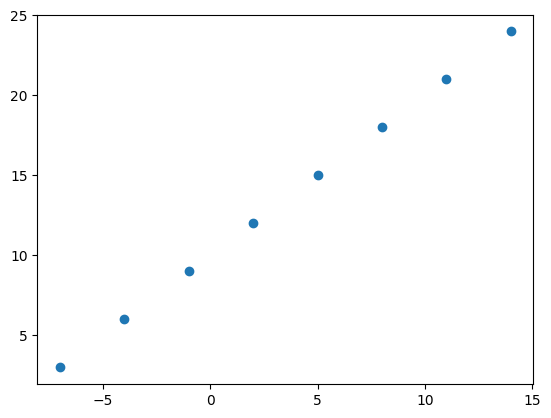

In [13]:
plt.scatter(X,y)

In [14]:
#steps in modeling with tensorflow
#set random seed
tf.random.set_seed(42)

#1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short-form for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic gradient decent
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 495ms/step - loss: 8.4592 - mae: 8.4592
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 8.3267 - mae: 8.3267
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 8.1942 - mae: 8.1942
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 8.0617 - mae: 8.0617
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 7.9292 - mae: 7.9292


In [15]:
#check X, y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
#make a prediction using our mode
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


In [17]:
y_pred+11

array([[38.509026]], dtype=float32)

In [18]:
#improve our model

#lets rebuild our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 0s 318ms/step - loss: 18.4603 - mae: 18.4603
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 18.1791 - mae: 18.1791
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 17.8978 - mae: 17.8978
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 17.6166 - mae: 17.6166
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 17.3353 - mae: 17.3353
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 17.0541 - mae: 17.0541
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 16.7728 - mae: 16.7728
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 16.4916 - mae: 16.4916
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 16.2103 - mae: 16.2103
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 15.9291 - mae: 15.9291
Epoch 11/1000
1/1 [=========================

In [19]:
#remind ourselves of the data
X,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
#lets see if our model's prediction has imporved
model.predict([17.0])

1/1 [==============================] - 0s 260ms/step


array([[28.002047]], dtype=float32)

In [21]:
#change another factor to imporve model
#improve our model

#lets rebuild our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.8649 - mae: 13.8649
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7976 - mae: 13.7976
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 13.7303 - mae: 13.7303
Epoch 4/100
1/1 [==============================] - 0s 49ms/step - loss: 13.6630 - mae: 13.6630
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 13.5957 - mae: 13.5957
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 13.5284 - mae: 13.5284
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 13.4611 - mae: 13.4611
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 13.3938 - mae: 13.3938
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 13.3264 - mae: 13.3264
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 13.2590 - mae: 13.2590
Epoch 11/100
1/1 [==============================] -

In [22]:
#lets see if our model's prediction has imporved
model.predict([17.0])

1/1 [==============================] - 0s 222ms/step


array([[30.533976]], dtype=float32)

In [23]:
#evaluating the model



when it comes to evaluation... there are 3 words you should memorize
> "visualize, visualize, visulaize"
its a good idea to visualize:
the data


the model itself



the training of a model
the predictions of model


In [24]:
X= tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
#make labels for the dataset
y= X+10
y


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

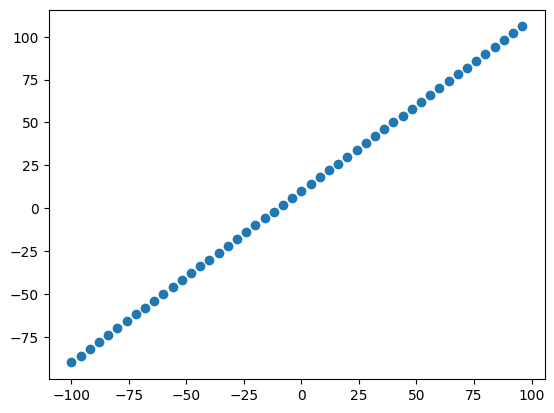

In [26]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

#@title Default title text
### the 3 sets.....

# the training set
# validation set
# test set

In [27]:
#check the length of how many samples we have
len(X)


50

In [28]:
#split the data into train and test sets
X_train = X[:40] # firdt 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples(20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)





(40, 10, 40, 10)

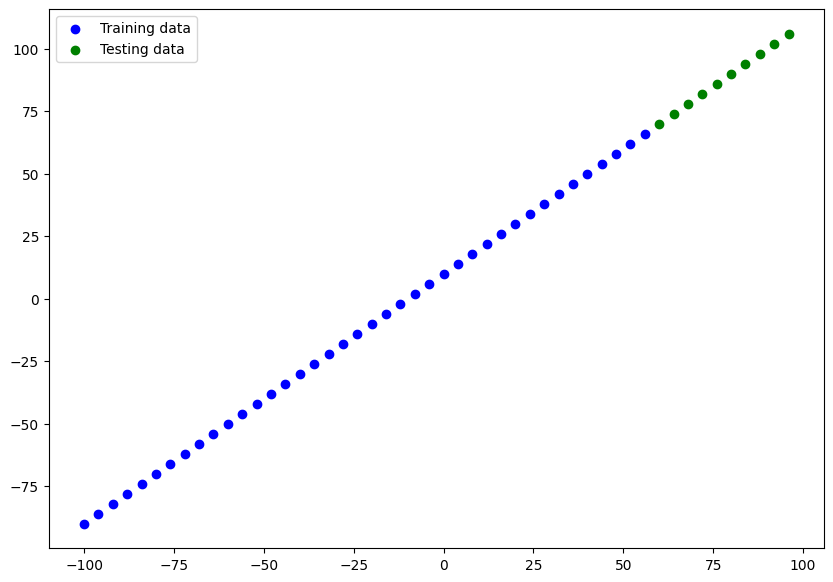

In [29]:
# visualizing the data
plt.figure(figsize=(10, 7))
#plot training data in blue
plt.scatter(X_train, y_train, c="b", label = 'Training data')

#plot training data in green
plt.scatter(X_test, y_test, c="g", label = 'Testing data')

#show a legend
plt.legend();



In [30]:
#let's have a look at how to build a neural network

#1. creat a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])


#complile the mode

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )

#3. fit the model
#model.fit(X_train, y_train, epochs=100)




In [31]:
model.summary()

ValueError: ignored

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# let's create a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)


#create a model (same as above)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], activation=None),
    tf.keras.layers.Dense(1, name='output_layer')

], name = "model_1")

#2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.019),
              metrics= ["mae"])




In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [35]:
#lets fit our model to the training data
model.fit(X_train, y_train ,epochs = 250, verbose = 0)

In [36]:
#get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


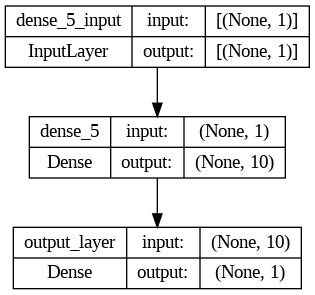

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [38]:
#visualizing our model's prediction
#make some pfredictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 74ms/step


array([[ 69.85174 ],
       [ 73.84322 ],
       [ 77.83472 ],
       [ 81.82621 ],
       [ 85.81771 ],
       [ 89.809204],
       [ 93.8007  ],
       [ 97.79219 ],
       [101.78368 ],
       [105.77517 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
#let's create a plotting functions
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):

  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label = "testing data")

  #plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label = "Predictions" )


  #show the legend
  plt.legend();


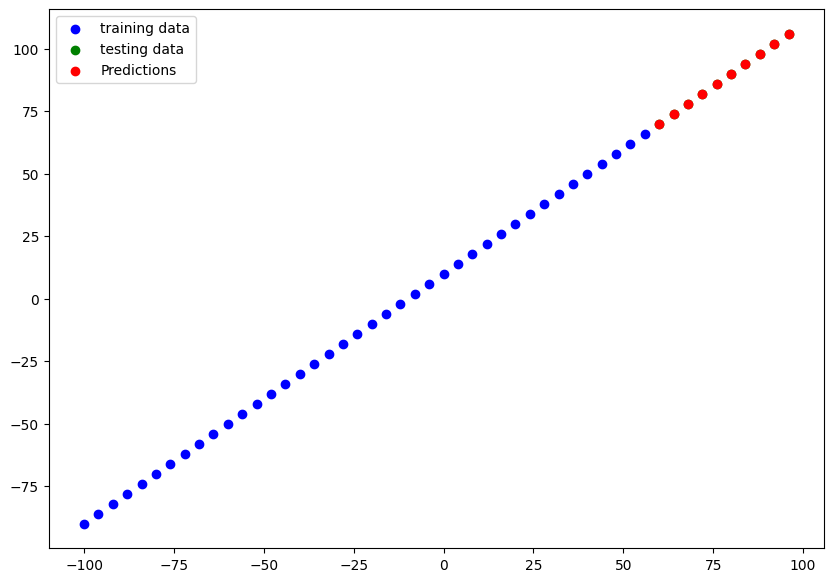

In [41]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

In [42]:
## eveluating our model's predictions with regression evaluation metrics


In [43]:
 #eveluate the model on test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 237ms/step - loss: 0.1865 - mae: 0.1865


[0.18654784560203552, 0.18654784560203552]

In [44]:
#calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test, y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.148262, 14.925421, 12.49917 , 10.869516, 10.036458, 10.      ,
       10.760139, 12.316876, 14.67021 , 17.820135], dtype=float32)>

In [45]:
tf.constant(y_pred)


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.85174 ],
       [ 73.84322 ],
       [ 77.83472 ],
       [ 81.82621 ],
       [ 85.81771 ],
       [ 89.809204],
       [ 93.8007  ],
       [ 97.79219 ],
       [101.78368 ],
       [105.77517 ]], dtype=float32)>

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.85174 ,  73.84322 ,  77.83472 ,  81.82621 ,  85.81771 ,
        89.809204,  93.8007  ,  97.79219 , 101.78368 , 105.77517 ],
      dtype=float32)>

In [48]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=0.18654557>

In [49]:
#calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.035396226>

In [50]:
#make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))



In [51]:
#running experiments to improve our model


In [52]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [53]:
#modeling experiments
#build model 1
#set ramdom seed
tf.random.set_seed(42)

#1. create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#2. compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

#3. fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 10.2228 - mae: 10.2228
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0862 - mae: 9.0862
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1570 - mae: 8.1570
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5483 - mae: 7.5483
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0471 - mae: 12.0471
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3175 - mae: 9.3175
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4749 - mae: 8.4749
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0278 - mae: 9.0278
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.5287 - mae: 18.5287
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9840 - mae: 9.9840
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 

1/1 [==============================] - 0s 96ms/step


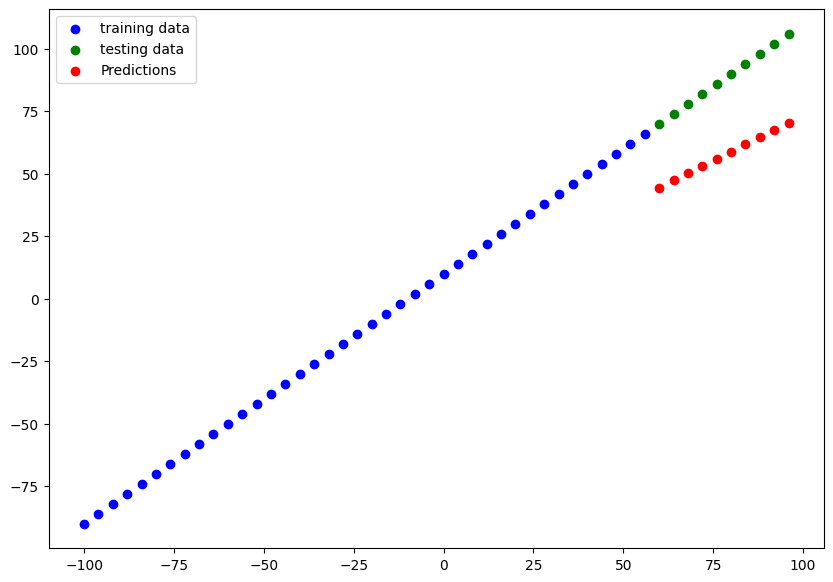

In [54]:
#make and plot predictions for model 1
y_preds_1 = model_1.predict(
    X_test
)
plot_predictions(predictions=y_preds_1)

In [55]:
#calculate model_1 eveluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.556952>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.1242>)

In [56]:
# #build model_2
#2 dense layers, trained for 100 epochs
#1.set random seed
tf.random.set_seed(42)

#create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mse'])

#fit the model
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 19ms/step - loss: 47.3463 - mse: 3443.8840
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 26.8625 - mse: 930.7089
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 31.8282 - mse: 1524.2318
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 28.3917 - mse: 1192.3456
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.4137 - mse: 305.6426
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2280 - mse: 186.7467
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5110 - mse: 161.3740
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2007 - mse: 177.2293
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 41.8980 - mse: 2801.3757
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 29.1102 - mse: 1198.3156
Epoch 11/100
2/2 [=======================

1/1 [==============================] - 0s 148ms/step


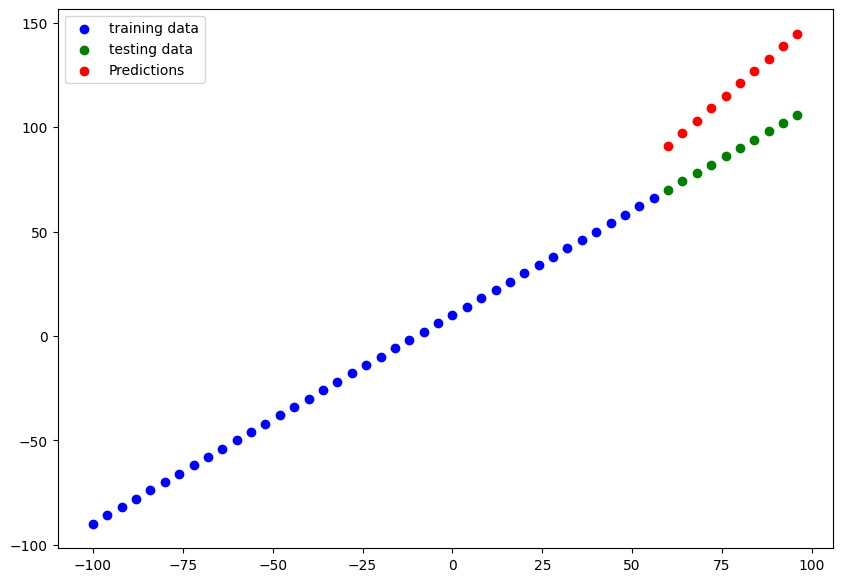

In [57]:
#make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)

In [58]:
#calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.944489>,
 <tf.Tensor: shape=(), dtype=float32, numpy=928.1447>)

In [59]:
#make model_3

# 2 layers trained for 500 epochs
#set random seeed
tf.random.set_seed(42)
#1.Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

#.3 fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 41.7515 - mae: 41.7515
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 24.9753 - mae: 24.9753
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 30.1314 - mae: 30.1314
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.8215 - mae: 27.8215
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 15.1400 - mae: 15.1400
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0237 - mae: 12.0237
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.3248 - mae: 11.3248
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1301 - mae: 11.1301
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 41.0436 - mae: 41.0436
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.3645 - mae: 28.3645
Epoch 11/500
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 131ms/step


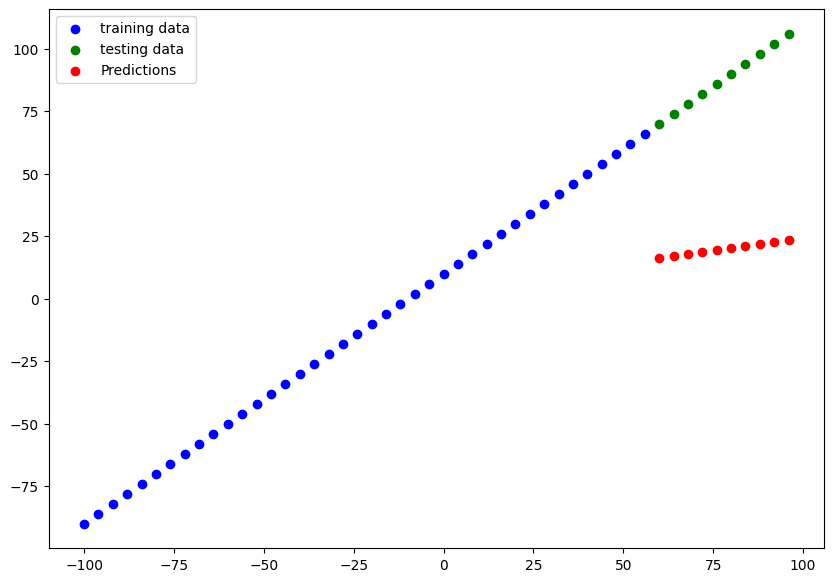

In [60]:
#make and plot some predictions

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [61]:
#calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_1)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.10539>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.1242>)

In [62]:
#comparing the results of the our experiments
#lets compare our model's results using a pandas dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ["model_2", mae_3.numpy(), mse_3.numpy()]
                 ]
all_results = pd.DataFrame(model_results, columns=['model', "mae", "mse"])
all_results



,model,mae,mse
0,model_1,30.556952,944.124207
1,model_2,29.944489,928.144714
2,model_2,68.105392,944.124207


In [63]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
### tracking your experiments


In [65]:
#saving our models
#using savedmodel format
model_2.save("best_model_savedModel_format")

In [66]:
#save using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

In [67]:
#loading in a saved model
#loading the savedmodel format mode
loaded_savedmodel_format = tf.keras.models.load_model("best_model_savedModel_format")
loaded_savedmodel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
#compare model_2 predictions with savedmodel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_savedmodel_format_preds = loaded_savedmodel_format.predict(X_test)
model_2_preds == loaded_savedmodel_format_preds

1/1 [==============================] - 0s 88ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
model_2_preds, loaded_savedmodel_format_preds

(array([[ 91.1553  ],
        [ 97.108444],
        [103.0616  ],
        [109.014755],
        [114.96791 ],
        [120.92107 ],
        [126.87422 ],
        [132.82738 ],
        [138.78053 ],
        [144.73369 ]], dtype=float32),
 array([[ 91.1553  ],
        [ 97.108444],
        [103.0616  ],
        [109.014755],
        [114.96791 ],
        [120.92107 ],
        [126.87422 ],
        [132.82738 ],
        [138.78053 ],
        [144.73369 ]], dtype=float32))

In [71]:
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_savedmodel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [72]:
model_2_preds.squeeze()

array([ 91.1553  ,  97.108444, 103.0616  , 109.014755, 114.96791 ,
       120.92107 , 126.87422 , 132.82738 , 138.78053 , 144.73369 ],
      dtype=float32)

In [73]:
loaded_savedmodel_format_preds.squeeze()

array([ 91.1553  ,  97.108444, 103.0616  , 109.014755, 114.96791 ,
       120.92107 , 126.87422 , 132.82738 , 138.78053 , 144.73369 ],
      dtype=float32)

In [74]:
model_2_preds.squeeze() == loaded_savedmodel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [75]:
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [76]:
#check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 79ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [77]:
#download a model (or any other file) from google colab

#using code
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
#save a file from google colab to google drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab Notebooks

!ls /content/drive/MyDrive/Colab Notebooks

cp: target 'Notebooks' is not a directory
ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks': No such file or directory


In [79]:
# a larger example
#import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt




In [80]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
insurance.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [82]:
insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [83]:
insurance['smoker'], insurance['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [84]:
#let's try one-hot encoder
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [85]:
# create X and y values(features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot['charges']
#view X
X.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [86]:
#view y
y.head(5)


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [87]:
#create traiing and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [88]:
#build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

#1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. compile
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics = ['mae'])

# fit the model
history = insurance_model.fit(X_train, y_train, epochs=1000)


Epoch 1/1000
34/34 [==============================] - 1s 3ms/step - loss: 8873.8662 - mae: 8873.8662
Epoch 2/1000
34/34 [==============================] - 0s 3ms/step - loss: 7077.0156 - mae: 7077.0156
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 6388.2671 - mae: 6388.2671
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 5937.9165 - mae: 5937.9165
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 5232.4897 - mae: 5232.4897
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 4225.8721 - mae: 4225.8721
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 3940.3179 - mae: 3940.3179
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 4074.7046 - mae: 4074.7046
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 3926.4985 - mae: 3926.4985
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 3780.4385 - mae:

In [89]:
#check the results of the insurnace model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3187.0901 - mae: 3187.0901


[3187.090087890625, 3187.090087890625]

Text(0.5, 0, 'epochs')

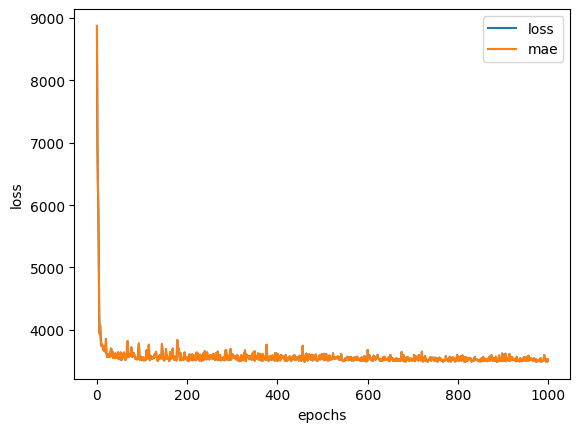

In [90]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [91]:
y_train.median(), y_train.mean()


(9575.4421, 13346.089736364485)

In [92]:
tf.random.set_seed(42)

In [93]:
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                          metrics=['mae'])
insurance_model_1.fit(X_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9852.7646 - mae: 9852.7646
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.8062 - mae: 7429.8062
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6961.1133 - mae: 6961.1133
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 6479.9136 - mae: 6479.9136
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6272.9878 - mae: 6272.9878
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 5938.5049 - mae: 5938.5049
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5390.5513 - mae: 5390.5513
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4559.3486 - mae: 4559.3486
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3899.5288 - mae: 3899.5288
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3941.2996 - mae: 3941.2996

In [94]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 1s 4ms/step - loss: 3262.5662 - mae: 3262.5662


[3262.566162109375, 3262.566162109375]

In [95]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae']
                          )
history = insurance_model_3.fit(X_train, y_train, epochs =200)


Epoch 1/200
34/34 [==============================] - 3s 6ms/step - loss: 13275.1846 - mae: 13275.1846
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13106.1816 - mae: 13106.1816
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12760.0029 - mae: 12760.0029
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12099.4492 - mae: 12099.4492
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11001.9316 - mae: 11001.9316
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9587.1777 - mae: 9587.1777
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8260.1113 - mae: 8260.1113
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7569.5493 - mae: 7569.5493
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7442.7842 - mae: 7442.7842
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7421.8892 - mae:

In [96]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3496.5820 - mae: 3496.5820


[3496.58203125, 3496.58203125]

In [97]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3187.0901 - mae: 3187.0901


[3187.090087890625, 3187.090087890625]

Text(0.5, 0, 'epochs')

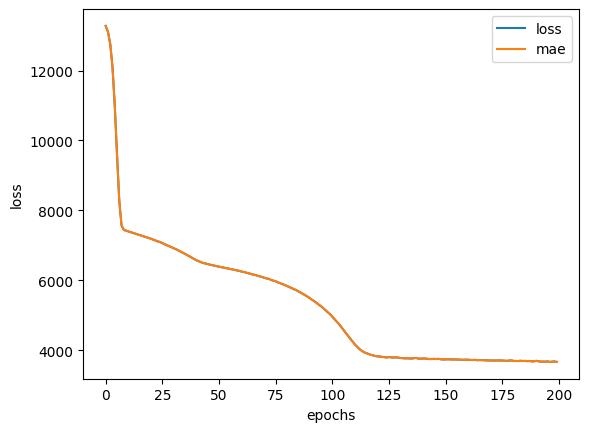

In [98]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [99]:
#preprocessing data(normalization and standardization)

In [100]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [101]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

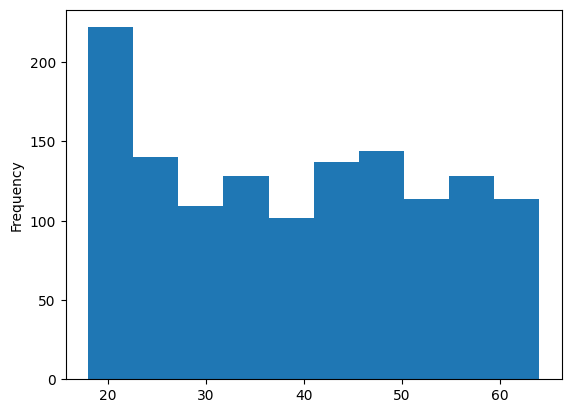

In [102]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

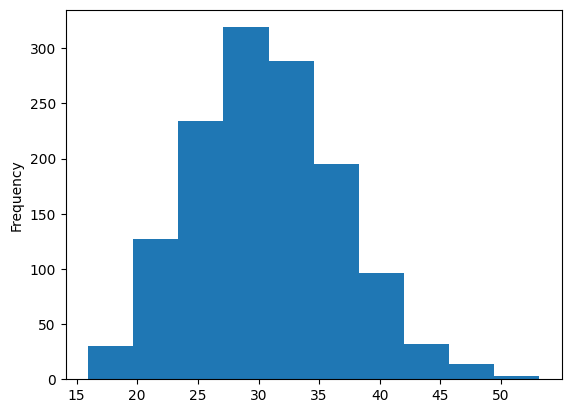

In [103]:
X['bmi'].plot(kind='hist')

In [104]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#read insurance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [106]:
#
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#crete a column transormer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values i these columns between 0 and 1
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', "region"])

    )

#create X and y
X = insurance.drop('charges', axis = 1)
y = insurance['charges']


#build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalization (MinMaxScaler ) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [107]:
#what does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [108]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [109]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [110]:
#build a neural network to fit on our normalized data
tf.random.set_seed(42)

#1. create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae']
                          )
#fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.2207 - mae: 13343.2207
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.1338 - mae: 13334.1338
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.5977 - mae: 13312.5977
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13268.4492 - mae: 13268.4492
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13190.3691 - mae: 13190.3691
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.9258 - mae: 13066.9258
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12887.8086 - mae: 12887.8086
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12642.9697 - mae: 12642.9697
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12322.2197 - mae: 12322.2197
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11920.86

In [111]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3434.8772 - mae: 3434.8772


[3434.877197265625, 3434.877197265625]

In [ ]:
#insurance model 2 results
# 9/9 [==============================] - 0s 3ms/step - loss: 3203.0815 - mae: 3203.0815
# [3203.08154296875, 3203.08154296875]



